- Nama: Rafael Nicholas Tanaja
- NIM: 2540118656

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
amd = pd.read_csv('gdrive/MyDrive/UAS_Deep_Learning/AMD.csv')

In [ ]:
aapl = pd.read_csv('gdrive/MyDrive/UAS_Deep_Learning/AAPL.csv')

## Data Preprocessing

In [ ]:
amd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10098 non-null  object 
 1   Open       10098 non-null  float64
 2   High       10098 non-null  float64
 3   Low        10098 non-null  float64
 4   Close      10098 non-null  float64
 5   Adj Close  10098 non-null  float64
 6   Volume     10098 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 552.4+ KB


In [ ]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9909 non-null   object 
 1   Open       9909 non-null   float64
 2   High       9909 non-null   float64
 3   Low        9909 non-null   float64
 4   Close      9909 non-null   float64
 5   Adj Close  9909 non-null   float64
 6   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 542.0+ KB


In [ ]:
amd.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
2,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
3,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
4,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [ ]:
aapl.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [ ]:
amd.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
10093,2020-03-26,45.779999,47.500000,45.400002,47.500000,47.500000,73680200
10094,2020-03-27,46.320000,47.980000,45.900002,46.580002,46.580002,74599200
10095,2020-03-30,47.240002,48.459999,46.660000,47.860001,47.860001,68486600
10096,2020-03-31,47.930000,48.529999,45.160000,45.480000,45.480000,83483700
10097,2020-04-01,44.180000,46.849998,43.160000,43.660000,43.660000,91895000


In [ ]:
aapl.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500
9908,2020-04-01,246.500000,248.720001,239.130005,240.910004,240.910004,43956200


In [ ]:
amd['Date'] = pd.to_datetime(amd['Date'])

In [ ]:
aapl['Date'] = pd.to_datetime(aapl['Date'])

- Datatype kolom date masih object sehingga diubah menjadi datetime
- Berdasarkan fungsi info, AMD memiliki jumlah lebih banyak daripada AAPL
- Time series dataset memiliki jangka waktu 1980-2020

In [ ]:
amd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10098 non-null  datetime64[ns]
 1   Open       10098 non-null  float64       
 2   High       10098 non-null  float64       
 3   Low        10098 non-null  float64       
 4   Close      10098 non-null  float64       
 5   Adj Close  10098 non-null  float64       
 6   Volume     10098 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 552.4 KB


In [ ]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9909 non-null   datetime64[ns]
 1   Open       9909 non-null   float64       
 2   High       9909 non-null   float64       
 3   Low        9909 non-null   float64       
 4   Close      9909 non-null   float64       
 5   Adj Close  9909 non-null   float64       
 6   Volume     9909 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 542.0 KB


In [ ]:
amd.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
aapl.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
amd.duplicated().sum()

0

In [ ]:
aapl.duplicated().sum()

0

In [ ]:
amd.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,10098.0,1.088914e+01,8.615288e+00,0.00,4.562500e+00,9.062500e+00,1.474750e+01,5.844000e+01
High,10098.0,1.146215e+01,8.475056e+00,1.69,5.062500e+00,9.280625e+00,1.500000e+01,5.927000e+01
Low,10098.0,1.095870e+01,8.077069e+00,1.61,4.812500e+00,8.875000e+00,1.443563e+01,5.751000e+01
Close,10098.0,1.121080e+01,8.283645e+00,1.62,4.937500e+00,9.062500e+00,1.470750e+01,5.890000e+01
Adj Close,10098.0,1.121080e+01,8.283645e+00,1.62,4.937500e+00,9.062500e+00,1.470750e+01,5.890000e+01
Volume,10098.0,1.451625e+07,2.396199e+07,0.00,1.098600e+06,5.518500e+06,1.742722e+07,3.250584e+08


In [ ]:
aapl.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,9909.0,3.260685e+01,5.841576e+01,0.198661,1.071429e+00,1.729286e+00,3.580000e+01,3.247400e+02
High,9909.0,3.293608e+01,5.900158e+01,0.198661,1.089286e+00,1.758929e+00,3.626571e+01,3.278500e+02
Low,9909.0,3.227756e+01,5.788304e+01,0.196429,1.048571e+00,1.696429e+00,3.532857e+01,3.233500e+02
Close,9909.0,3.261803e+01,5.847190e+01,0.196429,1.071429e+00,1.732143e+00,3.576143e+01,3.272000e+02
Adj Close,9909.0,3.057657e+01,5.674627e+01,0.155638,9.176431e-01,1.466154e+00,3.104237e+01,3.272000e+02
Volume,9909.0,8.582916e+07,8.597195e+07,347200.000000,3.304230e+07,5.766490e+07,1.069992e+08,1.855410e+09


- Tidak terdapat missing value pada kedua dataset
- Tidak terdapat duplicated rows
- Mengubah display format

##Exploratory Data Analysis

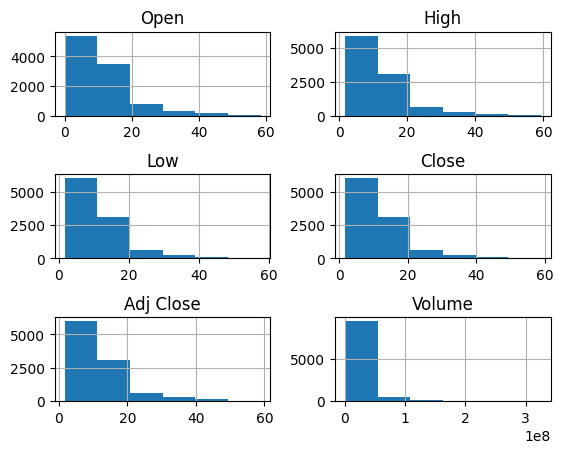

In [ ]:
amd.iloc[:, 1:].hist(bins = 6)
plt.subplots_adjust(hspace=0.7)
plt.show()

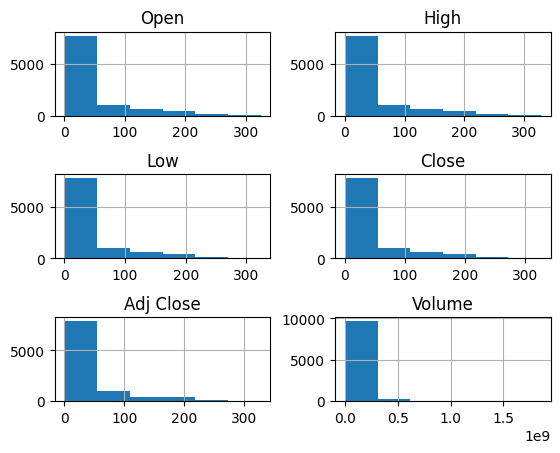

In [ ]:
aapl.iloc[:, 1:].hist(bins = 6)
plt.subplots_adjust(hspace=0.7)
plt.show()

- Data distribution terdapat positive skew, sehingga menggunakan square root transorm untuk memperbaiki data distribution.
- Pemilihan square root transform dikarenakan adanya zero values yang terdapat di dalam data.

In [ ]:
amdsqrt = amd.copy()

amdsqrt['Open'] = np.sqrt(amd['Open'])
amdsqrt['Close'] = np.sqrt(amd['Close'])
amdsqrt['High'] = np.sqrt(amd['High'])
amdsqrt['Low'] = np.sqrt(amd['Low'])
amdsqrt['Adj Close'] = np.sqrt(amd['Adj Close'])
amdsqrt['Volume'] = np.sqrt(amd['Volume'])

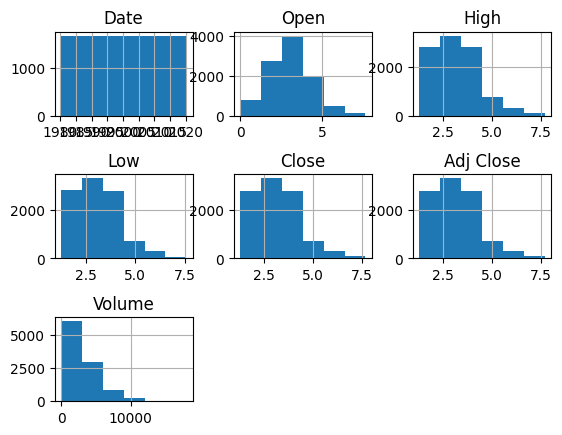

In [ ]:
amdsqrt.hist(bins = 6)
plt.subplots_adjust(hspace=0.7)
plt.show()

- Transform sudah cukup mengatasi skewed dalam data

In [ ]:
aaplsqrt = aapl.copy()

aaplsqrt['Open'] = np.sqrt(aapl['Open'])
aaplsqrt['Close'] = np.sqrt(aapl['Close'])
aaplsqrt['High'] = np.sqrt(aapl['High'])
aaplsqrt['Low'] = np.sqrt(aapl['Low'])
aaplsqrt['Adj Close'] = np.sqrt(aapl['Adj Close'])
aaplsqrt['Volume'] = np.sqrt(aapl['Volume'])

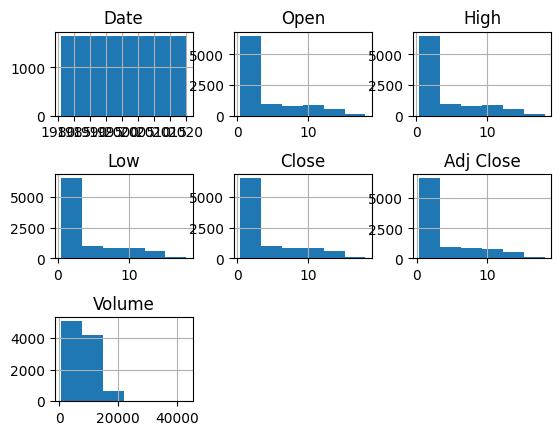

In [ ]:
aaplsqrt.hist(bins = 6)
plt.subplots_adjust(hspace=0.7)
plt.show()

In [ ]:
amdsqrt.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,10098.0,2.998108,1.378648,0.000000,2.136001,3.010399,3.840247,7.644606
High,10098.0,3.187391,1.141411,1.300000,2.250000,3.046412,3.872983,7.698701
Low,10098.0,3.116910,1.115213,1.268858,2.193741,2.979094,3.799424,7.583535
Close,10098.0,3.152253,1.128817,1.272792,2.222049,3.010399,3.835036,7.674634
Adj Close,10098.0,3.152253,1.128817,1.272792,2.222049,3.010399,3.835036,7.674634
Volume,10098.0,2969.100957,2387.730057,0.000000,1048.141212,2349.148780,4174.592794,18029.376029


- Transform masih belum sepenuhnya mengatasi skewed data distribution

In [ ]:
amdsqrt = amdsqrt.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1)
aaplsqrt = aaplsqrt.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1)

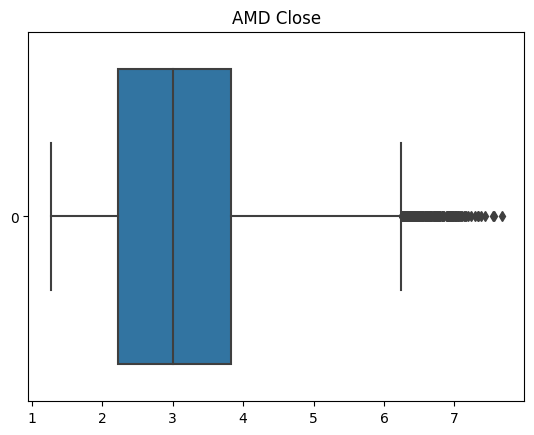

In [ ]:
sns.boxplot(data = amdsqrt['Close'], orient = 'h')
plt.title('AMD Close')
plt.show()

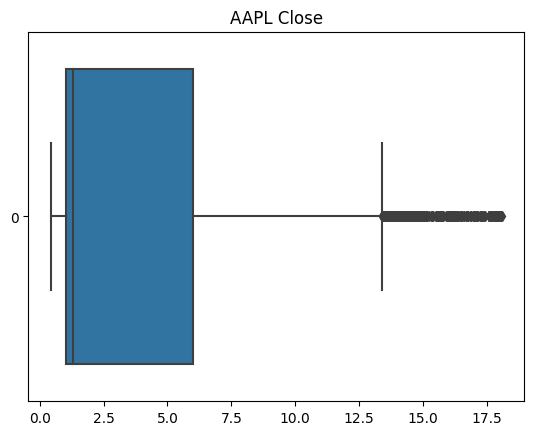

In [ ]:
sns.boxplot(data = aaplsqrt['Close'], orient = 'h')
plt.title('AAPL Close')
plt.show()

- Terdapat outlier pada kedua dataset, sehingga akan dilakukan handling outliers menggunakan metode IQR dikarenakan dataset tidak terlalu simetris

In [ ]:
def removeoutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1

    result = x[~((x < (q1 - 1.5 * iqr)) | (x > (q3 + 1.5 * iqr)))]

    return result

In [ ]:
amdsqrt['Close'] = removeoutliers(amdsqrt['Close'])
aaplsqrt['Close'] = removeoutliers(aaplsqrt['Close'])

In [ ]:
amdsqrt.isna().sum()

Date       0
Close    170
dtype: int64

In [ ]:
aaplsqrt.isna().sum()

Date       0
Close    407
dtype: int64

In [ ]:
amdsqrt = amdsqrt.dropna()

In [ ]:
aaplsqrt = aaplsqrt.dropna()

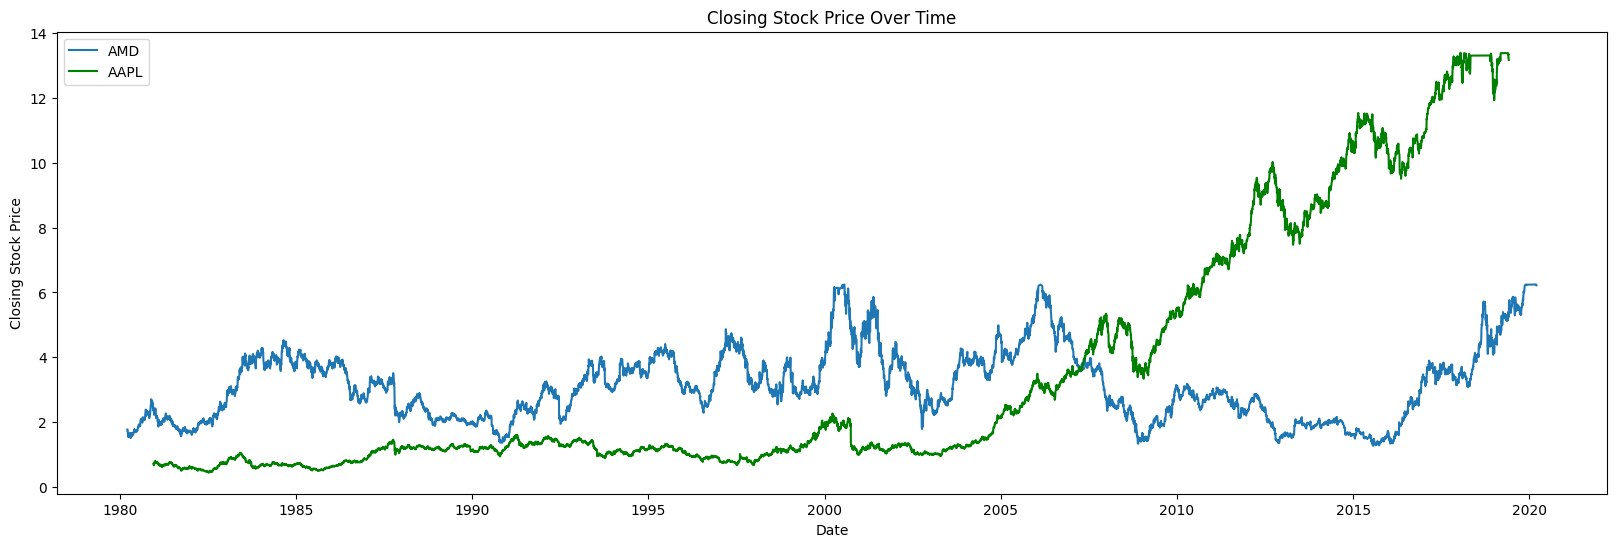

In [ ]:
plt.subplots(figsize=(20, 6))

sns.lineplot(x='Date', y='Close', data=amdsqrt, label="AMD")
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')

sns.lineplot(x='Date', y='Close', data = aaplsqrt, color = "green", label="AAPL")
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')

plt.legend(loc='upper left')

plt.show()

- Harga penutupan saham AMD secara keseluruhan stagnan dari tahun 1980 hinggga 2020
- Harga penutupan saham AAPL secara keseluruhan meningkat dari tahun 1980  hingga 2020
- Jika dibandingkan, saham AAPL memiliki performa yang lebih baik pada sekitar 2005-2010 dan hal ini mungkin disebabkan oleh semakin meningkatnya penggunaan smartphone dan dimulainya era digital

## Window and Split Data

In [ ]:
amdsqrt_close = amdsqrt['Close'].to_numpy()
aaplsqrt_close = aaplsqrt['Close'].to_numpy()

In [ ]:
print(len(amdsqrt_close))
print(len(aaplsqrt_close))

9928
9502


In [ ]:
windowsize = 5
horizon = 1

In [ ]:
def labelwindow(x, horizon):
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
def make_windows(x, window_size, horizon):
  step = np.expand_dims(np.arange(windowsize + horizon), axis=0)

  index = step + np.expand_dims(np.arange(len(x) - (windowsize+horizon-1)), axis=0).T

  arr = x[index]

  input, output = labelwindow(arr, horizon)

  return input, output

In [ ]:
amdinput, amdoutput = make_windows(amdsqrt_close, windowsize, horizon)

aaplinput, aaploutput = make_windows(aaplsqrt_close, windowsize, horizon)

In [ ]:
print("AMD Input and AMD Output")
for i in range(5):
  print(f"Window: {amdinput[i-3]} -> Label: {amdoutput[i-3]}")

AMD Input and AMD Output
Window: [6.19273756 6.20966999 6.24419744 6.22334312 6.23698657] -> Label: [6.23939102]
Window: [6.20966999 6.24419744 6.22334312 6.23698657 6.23939102] -> Label: [6.24579845]
Window: [6.24419744 6.22334312 6.23698657 6.23939102 6.24579845] -> Label: [6.22173602]
Window: [1.7736497  1.74104853 1.74403748 1.73505526 1.70782515] -> Label: [1.63299319]
Window: [1.74104853 1.74403748 1.73505526 1.70782515 1.63299319] -> Label: [1.61374309]


In [ ]:
print("AAPL Input and AAPL Output")
for i in range(5):
  print(f"Window: {aaplinput[i-3]} -> Label: {aaploutput[i-3]}")

AAPL Input and AAPL Output
Window: [13.14952485 13.37535023 13.37796701 13.35028074 13.3184085 ] -> Label: [13.35290242]
Window: [13.37535023 13.37796701 13.35028074 13.3184085  13.35290242] -> Label: [13.23140232]
Window: [13.37796701 13.35028074 13.3184085  13.35290242 13.23140232] -> Label: [13.1643459]
Window: [0.71651439 0.69757231 0.67148557 0.67974522 0.68952624] -> Label: [0.71025648]
Window: [0.69757231 0.67148557 0.67974522 0.68952624 0.71025648] -> Label: [0.72733614]


In [ ]:
print("AMD Input and Output Size")
print(len(amdinput))
print(len(amdoutput))

AMD Input and Output Size
9923
9923


In [ ]:
print("AAPL Input and Output Size")
print(len(aaplinput))
print(len(aaploutput))

AAPL Input and Output Size
9497
9497


In [ ]:
def datasplit(input, output):
  train_size = int(0.8 * len(input))
  test_size = train_size + int(0.1 * len(input))

  X_train, y_train = input[:train_size], output[:train_size]
  X_test, y_test = input[train_size:test_size], output[train_size:test_size]
  X_val, y_val = input[test_size:], output[test_size:]

  return X_train, y_train, X_test, y_test, X_val, y_val

In [ ]:
amd_Xtrain, amd_ytrain, amd_Xtest, amd_ytest, amd_Xval, amd_yval = datasplit(amdinput, amdoutput)

In [ ]:
aapl_Xtrain, aapl_ytrain, aapl_Xtest, aapl_ytest, aapl_Xval, aapl_yval = datasplit(aaplinput, aaploutput)

In [ ]:
print("AMD Split:")
print(len(amd_Xtrain))
print(len(amd_ytrain))

print(len(amd_Xtest))
print(len(amd_ytest))

print(len(amd_Xval))
print(len(amd_yval))

AMD Split:
7938
7938
992
992
993
993


In [ ]:
print("AAPL Split:")
print(len(aapl_Xtrain))
print(len(aapl_ytrain))

print(len(aapl_Xtest))
print(len(aapl_ytest))

print(len(aapl_Xval))
print(len(aapl_yval))

AAPL Split:
7597
7597
949
949
951
951


## Baseline Architecture

In [ ]:
def lstmbaseline():
  model = Sequential()
  model.add(LSTM(units=50, activation='relu', input_shape=(windowsize, horizon)))
  model.add(Dense(units=1))

  model.compile(optimizer='adam', loss='mean_squared_error')

  return model

In [ ]:
lstm_baseline = lstmbaseline()
lstm_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = lstm_baseline.fit(amd_Xtrain, amd_ytrain, validation_data = (amd_Xtest, amd_ytest), epochs = 20, batch_size = 64)

Epoch 1/20
125/125 [==============================] - 3s 8ms/step - loss: 1.7059 - val_loss: 0.0433
Epoch 2/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0146 - val_loss: 0.0030
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0079 - val_loss: 0.0032
Epoch 4/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0079 - val_loss: 0.0030
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0078 - val_loss: 0.0033
Epoch 6/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0077 - val_loss: 0.0026
Epoch 7/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0076 - val_loss: 0.0030
Epoch 8/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0074 - val_loss: 0.0024
Epoch 9/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0073 - val_loss: 0.0027
Epoch 10/20
125/125 [==============================] - 1s 7ms/step - loss: 0.0071 - val_loss: 0.0045

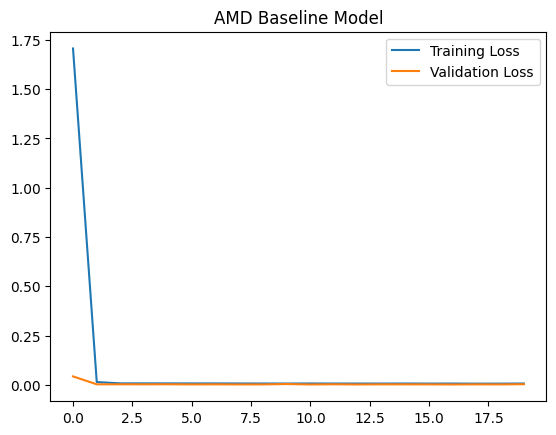

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("AMD Baseline Model")
plt.legend(loc='upper right')
plt.show()

In [ ]:
history1 = lstm_baseline.fit(aapl_Xtrain, aapl_ytrain, validation_data = (aapl_Xtest, aapl_ytest), epochs = 20, batch_size = 64)

Epoch 1/20
119/119 [==============================] - 1s 6ms/step - loss: 0.0047 - val_loss: 0.1616
Epoch 2/20
119/119 [==============================] - 1s 6ms/step - loss: 0.0030 - val_loss: 0.1201
Epoch 3/20
119/119 [==============================] - 1s 6ms/step - loss: 0.0024 - val_loss: 0.0091
Epoch 4/20
119/119 [==============================] - 1s 6ms/step - loss: 0.0021 - val_loss: 0.0103
Epoch 5/20
119/119 [==============================] - 1s 9ms/step - loss: 0.0020 - val_loss: 0.0165
Epoch 6/20
119/119 [==============================] - 2s 13ms/step - loss: 0.0018 - val_loss: 0.0167
Epoch 7/20
119/119 [==============================] - 1s 9ms/step - loss: 0.0018 - val_loss: 0.0246
Epoch 8/20
119/119 [==============================] - 2s 18ms/step - loss: 0.0024 - val_loss: 0.1490
Epoch 9/20
119/119 [==============================] - 1s 12ms/step - loss: 0.0022 - val_loss: 0.0219
Epoch 10/20
119/119 [==============================] - 1s 12ms/step - loss: 0.0017 - val_loss: 0.

In [ ]:
plt.plot(history1.history1['loss'], label='Training Loss')
plt.plot(history1.history1['val_loss'], label='Validation Loss')
plt.title("AAPL Baseline Model")
plt.legend(loc='upper right')
plt.show()

AttributeError: ignored

## Modified Model